#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [8]:
img=cv2.imread("Plaksha_Faculty.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
faces_rect = face_cascade.detectMultiScale(gray, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
text = "Face" 
font = cv2.FONT_HERSHEY_SIMPLEX  
font_scale = 0.5  
font_color = (0,0,255) 
font_thickness = 1  

for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness, cv2.LINE_AA)
cv2.imwrite("first_image.jpg", img)
cv2.imshow("Total number of face detected are {}".format(len(faces_rect)), img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


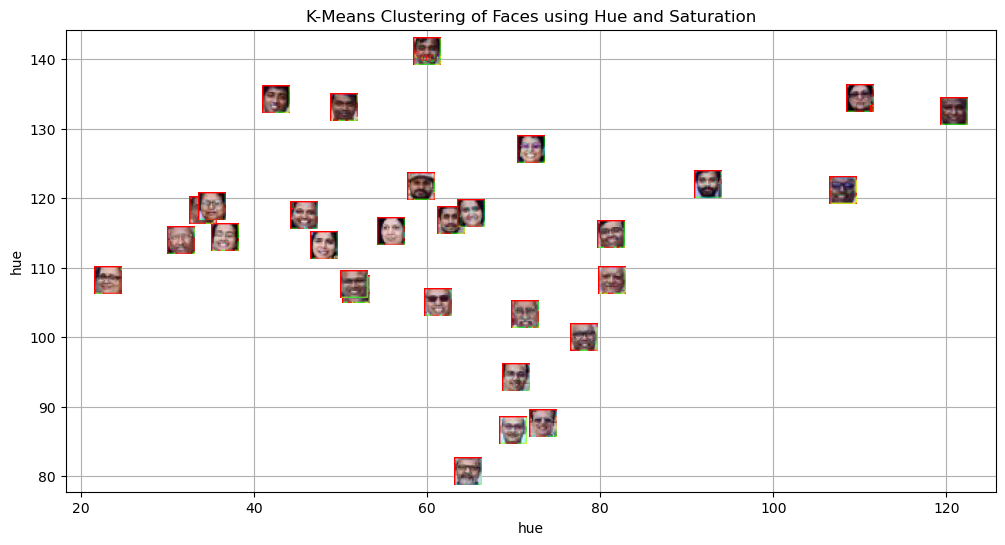

In [11]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
hue_saturation = []
face_images = []  

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

fig, ax = plt.subplots(figsize=(12, 6))

for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
plt.xlabel("hue")
plt.ylabel("hue")
plt.title("K-Means Clustering of Faces using Hue and Saturation")
plt.grid(True)
plt.savefig("face_clusters.png", dpi=300, bbox_inches="tight")
plt.show()

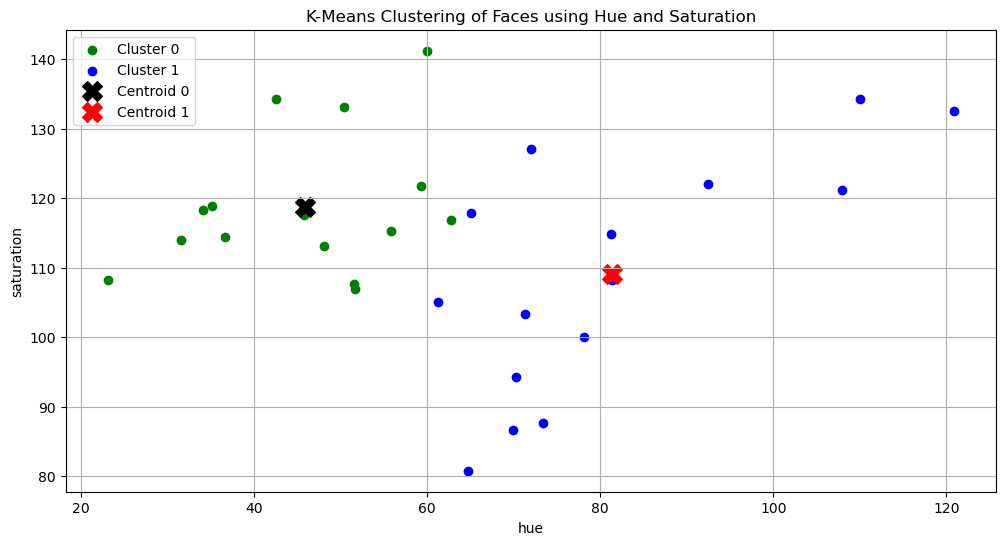

In [12]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1],color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1],color='blue', label='Cluster 1')

centroid_0 =np.mean(cluster_0_points, axis=0)
centroid_1 =np.mean(cluster_1_points, axis=0)


plt.scatter(centroid_0[0], centroid_0[1],color='black', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='X', s=200, label='Centroid 1')

plt.xlabel("hue")
plt.ylabel("saturation")
plt.title("K-Means Clustering of Faces using Hue and Saturation")
plt.legend()
plt.grid(True)
plt.savefig("kmeans clustering hue and saturation.png", dpi=300, bbox_inches="tight")
plt.show()


In [17]:
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')

template_faces =face_cascade.detectMultiScale(cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY),1.1,5)
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imwrite("temaplate.jpg",template_img)
cv2.imshow("Template Image Face Detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

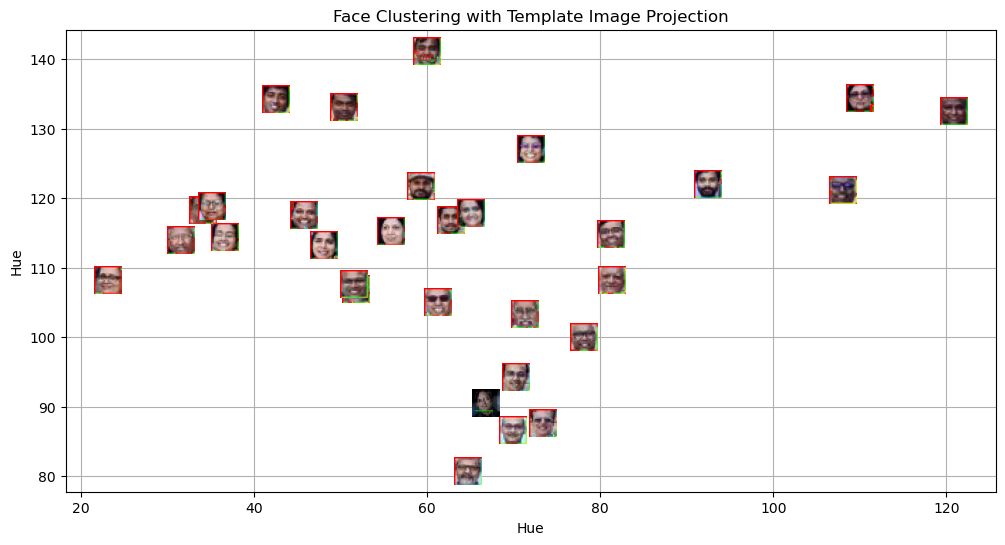

In [18]:
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

template_label =kmeans.predict([[template_hue, template_saturation]])[0]

fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Hue")
plt.title("Face Clustering with Template Image Projection")
plt.grid(True)
plt.savefig("faceclustering template image", dpi=300, bbox_inches="tight")
plt.show()

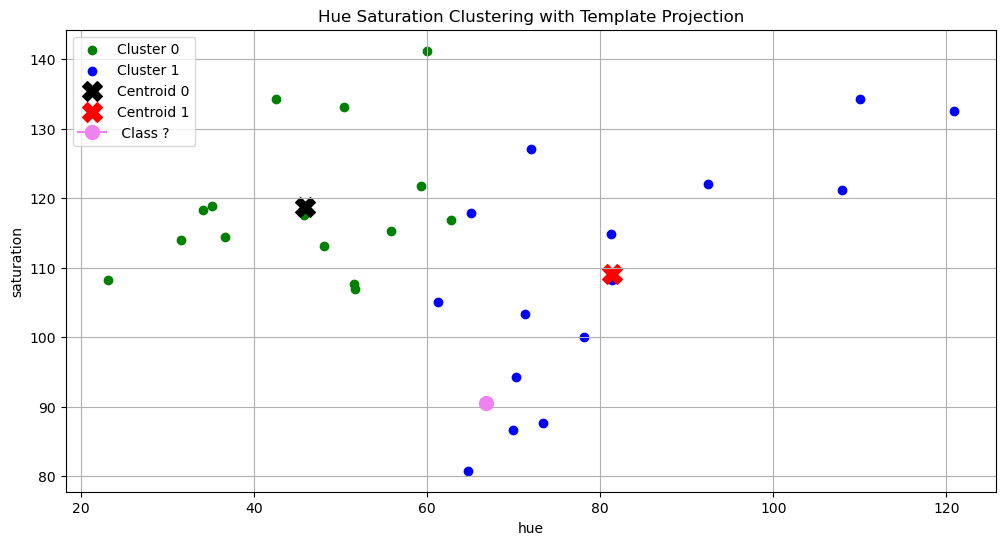

In [19]:
legend_labels = []

cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1],color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1],color='blue', label='Cluster 1')


centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1],color='black', marker='X', s=200, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1],color='red', marker='X', s=200, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )


plt.xlabel("hue")
plt.ylabel("saturation")
plt.title("Hue Saturation Clustering with Template Projection")
plt.legend()
plt.grid(True)
plt.savefig("image.png", dpi=300, bbox_inches="tight")
plt.show()
                                       

## Report:
## Answer the following questions within your report:


## 1.What are the common distance metrics used in distance-based classification algorithms?
Common distance metrics include Euclidean, Manhattan, Chebyshev, and Cosine distance.

## 2. What are some real-world applications of distance-based classification algorithms?
They are used in face recognition, handwritten digit recognition, image classification, recommendation systems, and medical diagnosis.

## 3. Explain various distance metrics.
Euclidean measures straight-line distance, Manhattan sums absolute differences, Chebyshev takes the maximum coordinate difference, and Cosine measures the angle between vectors.

## 4. What is the role of cross-validation in model performance?
Cross-validation evaluates model performance on unseen data, helps tune hyperparameters (like K in KNN), and reduces overfitting.

## 5. Explain variance and bias in terms of KNN.
In KNN, small K gives low bias but high variance (overfitting), while large K gives high bias but low variance (underfitting).